# Importando bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums 
%matplotlib inline

# Acessando dados

In [ ]:
estadual = pd.read_csv('dados_rede_estadual.csv')

In [ ]:
privada = pd.read_csv('dados_rede_privada.csv')

In [ ]:
publica = pd.read_csv('dados_rede_publica.csv')

In [ ]:
todos = pd.read_csv('dados_todas_as_redes.csv')

# Visualização Matrículas

## Selecionando o indicador 'Matrículas'

In [ ]:
total_estadual = estadual.loc[0]
total_privada = privada.loc[0]
total_municipal = publica.loc[0]

In [ ]:
df1 = pd.DataFrame(total_estadual)
df2 = pd.DataFrame(total_privada)
df3 = pd.DataFrame(total_municipal)

In [ ]:
frames = [df1, df2, df3]

In [ ]:
resultado_1 = pd.concat(frames)

In [ ]:
resultado_1.reset_index(level=0, inplace=True)

In [ ]:
resultado_1 = resultado_1.drop(resultado_1.index[[0, 1, 4, 5, 8, 9]])

In [ ]:
resultado_1 = resultado_1.rename(columns={0:'Valores', 'index':'Tipo_escola'})

In [ ]:
resultado_1['Valores'] = resultado_1['Valores'].astype(int)

## Plotando os gráficos

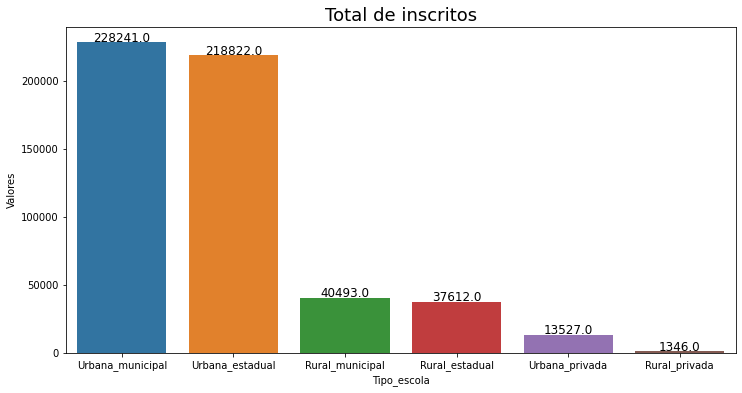

In [ ]:
ax = plt.figure(figsize=(12, 6))
fig_1 = sns.barplot(x='Tipo_escola', y='Valores', data=resultado_1.sort_values('Valores', ascending=False), ci=False)
for i in fig_1.patches:
  fig_1.annotate(i.get_height(), (i.get_x() + i.get_width() / 2, i.get_height())
  , ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), 
  textcoords='offset points')
fig_1.set_title('Total de inscritos', fontsize= 18)
ax=ax

In [ ]:
fig_1.get_figure().savefig('Figura_1.png')

# Visualização distorção idade-série

In [ ]:
dist_estadual = estadual.loc[1]
dist_municipal = publica.loc[1]
dist_privada = privada.loc[1]

In [ ]:
df4 = pd.DataFrame(dist_estadual)
df5 = pd.DataFrame(dist_municipal)
df6 = pd.DataFrame(dist_privada)

In [ ]:
frames_1 = [df4, df5, df6]
resultado_2 = pd.concat(frames_1)
resultado_2.reset_index(level=0, inplace=True)

In [ ]:
resultado_2 = resultado_2.drop(resultado_2.index[[0, 1, 4, 5, 8, 9]])

In [ ]:
resultado_2 = resultado_2.rename(columns={1:'Valores(%)', 'index':'Tipo_escola'})

In [ ]:
def troca_sinal(num):
  num = num.replace('%','').replace(',','.')
  return num

In [ ]:
resultado_2['Valores(%)'] = resultado_2['Valores(%)'].apply(troca_sinal)

In [ ]:
resultado_2['Valores(%)'] = resultado_2['Valores(%)'].astype(float)

In [ ]:
resultado_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 2 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tipo_escola  6 non-null      object 
 1   Valores(%)   6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 144.0+ bytes


## Plotando os gráficos

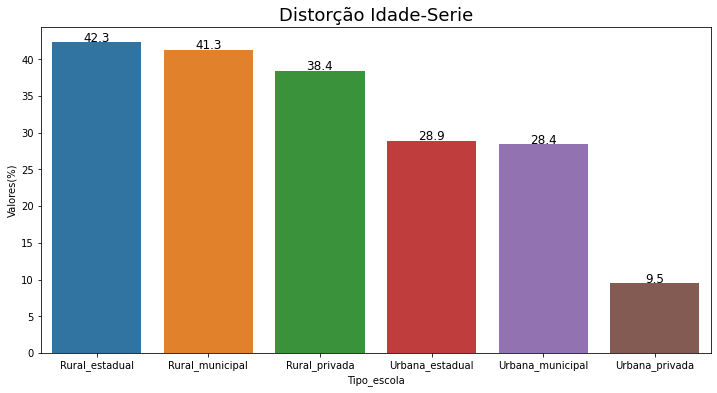

In [ ]:
ax = plt.figure(figsize=(12, 6))
fig_2 = sns.barplot(x='Tipo_escola', y='Valores(%)', data=resultado_2.sort_values('Valores(%)', ascending=False), ci=False)
for i in fig_2.patches:
  fig_2.annotate(i.get_height(), (i.get_x() + i.get_width() / 2, i.get_height())
  , ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), 
  textcoords='offset points')
fig_2.set_title('Distorção Idade-Serie', fontsize= 18)
ax=ax

In [ ]:
fig_2.get_figure().savefig('Figura_2.png')

# AFD (Adequação da formação docente) total

In [ ]:
afd_estadual = estadual.loc[5]
afd_municipal = publica.loc[5]
afd_privada = privada.loc[5]

In [ ]:
df7 = pd.DataFrame(afd_estadual)
df8 = pd.DataFrame(afd_municipal)
df9 = pd.DataFrame(afd_privada)

In [ ]:
frames_2 = [df7, df8, df9]
resultado_3 = pd.concat(frames_2)
resultado_3.reset_index(level=0, inplace=True)

In [ ]:
resultado_3 = resultado_3.drop(resultado_3.index[[0, 1, 4, 5, 8, 9]])


In [ ]:
resultado_3 = resultado_3.rename(columns={5:'Valores(%)', 'index':'Tipo_escola'})
resultado_3['Valores(%)'] = resultado_3['Valores(%)'].apply(troca_sinal)
resultado_3['Valores(%)'] = resultado_3['Valores(%)'].astype(float)
resultado_3 = resultado_3.reset_index()
resultado_3

,index,Tipo_escola,Valores(%)
0,2,Urbana_estadual,57.3
1,3,Rural_estadual,38.7
2,6,Urbana_municipal,57.9
3,7,Rural_municipal,39.9
4,10,Urbana_privada,52.2
5,11,Rural_privada,34.8


## Plotando os gráficos

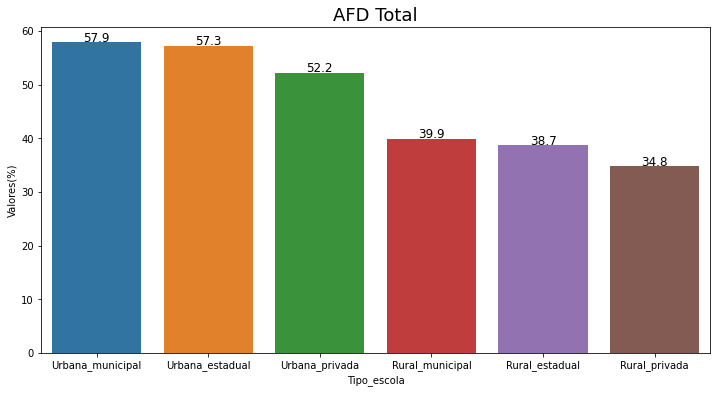

In [ ]:
ax = plt.figure(figsize=(12, 6))
fig_3 = sns.barplot(x='Tipo_escola', y='Valores(%)', data=resultado_3.sort_values('Valores(%)', ascending=False), ci=False)
for i in fig_3.patches:
  fig_3.annotate(i.get_height(), (i.get_x() + i.get_width() / 2, i.get_height())
  , ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), 
  textcoords='offset points')
fig_3.set_title('AFD Total', fontsize= 18)
ax=ax

In [ ]:
fig_3.get_figure().savefig('Figura_3.png')

# Escolas com acesso a internet

## Para o Ensino

In [ ]:
internet_estadual = estadual.loc[19]
internet_municipal = publica.loc[16]
internet_privada = privada.loc[18]

In [ ]:
df10 = pd.DataFrame(internet_estadual)
df11 = pd.DataFrame(internet_municipal)
df12 = pd.DataFrame(internet_privada)
df10 = df10.rename(columns={19:'Valores(%)'})
df11 = df11.rename(columns={16:'Valores(%)'})
df12 = df12.rename(columns={18:'Valores(%)'})

In [ ]:
frames_3 = [df10, df11, df12]
resultado_4 = pd.concat(frames_3)
resultado_4.reset_index(level=0, inplace=True)
resultado_4 = resultado_4.drop(resultado_4.index[[0, 1, 4, 5, 8, 9]])


In [ ]:
resultado_4

,index,Valores(%)
2,Urbana_estadual,"89,3%"
3,Rural_estadual,"40,8%"
6,Urbana_municipal,"89,5%"
7,Rural_municipal,"42,7%"
10,Urbana_privada,"98,1%"
11,Rural_privada,"53,6%"


In [ ]:
resultado_4 = resultado_4.rename(columns={'index':'Tipo_escola'})
resultado_4['Valores(%)'] = resultado_4['Valores(%)'].apply(troca_sinal)
resultado_4['Valores(%)'] = resultado_4['Valores(%)'].astype(float)
resultado_4 = resultado_4.reset_index()
resultado_4

,index,Tipo_escola,Valores(%)
0,2,Urbana_estadual,89.3
1,3,Rural_estadual,40.8
2,6,Urbana_municipal,89.5
3,7,Rural_municipal,42.7
4,10,Urbana_privada,98.1
5,11,Rural_privada,53.6


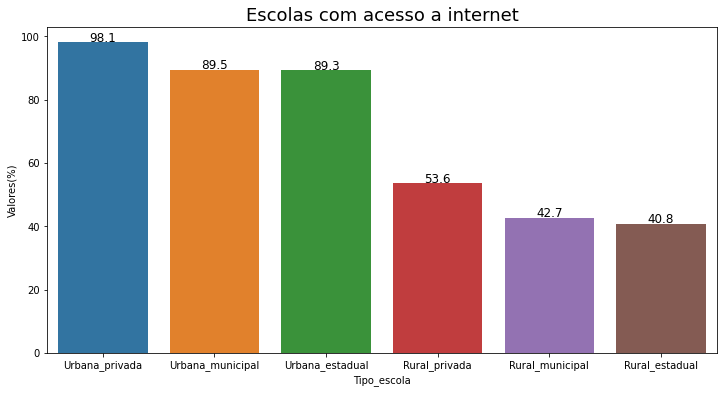

In [ ]:
ax = plt.figure(figsize=(12, 6))
fig_4 = sns.barplot(x='Tipo_escola', y='Valores(%)', data=resultado_4.sort_values('Valores(%)', ascending=False), ci=False)
for i in fig_4.patches:
  fig_4.annotate(i.get_height(), (i.get_x() + i.get_width() / 2, i.get_height())
  , ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), 
  textcoords='offset points')
fig_4.set_title('Escolas com acesso a internet', fontsize= 18)
ax=ax

In [ ]:
fig_4.get_figure().savefig('Figura_4.png')

## Para os Alunos

In [ ]:
aluno_estadual = estadual.loc[21]
aluno_municipal = publica.loc[18]
aluno_privada = privada.loc[20]

In [ ]:
df13 = pd.DataFrame(internet_estadual)
df14 = pd.DataFrame(internet_municipal)
df15 = pd.DataFrame(internet_privada)
df13 = df13.rename(columns={21:'Valores(%)'})
df14 = df14.rename(columns={18:'Valores(%)'})
df15 = df15.rename(columns={20:'Valores(%)'})

In [ ]:
df13

,Valores(%)
Indicador,Int. p/ alunos (%)
Total,"28,5%"
Urbana_estadual,"38,7%"
Rural_estadual,"11,2%"


In [ ]:
frames_4 = [df13, df14, df15]
resultado_5 = pd.concat(frames_4)
resultado_5.reset_index(level=0, inplace=True)
resultado_5 = resultado_5.drop(resultado_5.index[[0, 1, 4, 5, 8, 9]])

In [ ]:
resultado_5 = resultado_5.rename(columns={'index':'Tipo_escola'})
resultado_5['Valores(%)'] = resultado_5['Valores(%)'].apply(troca_sinal)
resultado_5['Valores(%)'] = resultado_5['Valores(%)'].astype(float)
resultado_5 = resultado_5.reset_index()
resultado_5

,index,Tipo_escola,Valores(%)
0,2,Urbana_estadual,38.7
1,3,Rural_estadual,11.2
2,6,Urbana_municipal,41.2
3,7,Rural_municipal,13.4
4,10,Urbana_privada,52.8
5,11,Rural_privada,32.1


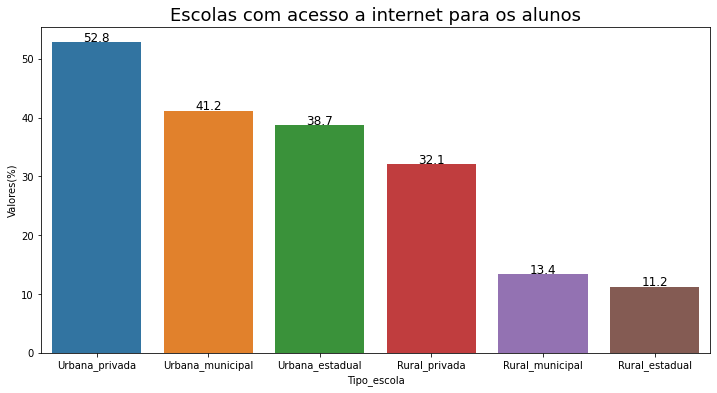

In [ ]:
ax = plt.figure(figsize=(12, 6))
fig_5 = sns.barplot(x='Tipo_escola', y='Valores(%)', data=resultado_5.sort_values('Valores(%)', ascending=False), ci=False)
for i in fig_5.patches:
  fig_5.annotate(i.get_height(), (i.get_x() + i.get_width() / 2, i.get_height())
  , ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), 
  textcoords='offset points')
fig_5.set_title('Escolas com acesso a internet para os alunos', fontsize= 18)
ax=ax

In [ ]:
fig_5.get_figure().savefig('Figura_5.png')

# Ensino

## Multímídia 

## PC/Tablet

# Teste de Hipótese

## H<sup>null</sup>
**Estudantes de escolas particulares não têm menor distorção idade-série**

## H<sup>alt</sup>
**Estudantes de escolas particulares não têm menor distorção idade-série**

In [ ]:
resultado_2

,Tipo_escola,Valores(%)
2,Urbana_estadual,28.9
3,Rural_estadual,42.3
6,Urbana_municipal,28.4
7,Rural_municipal,41.3
10,Urbana_privada,9.5
11,Rural_privada,38.4


## H<sup>null</sup>
**Escolas com maiores AFD têm menor distorção idade série**

## H<sup>alt</sup>
**Escolas com maiores AFD não têm menor distorção idade série**
